# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup object
html = browser.html
soup = soup(html, 'html.parser')
soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [5]:
# Extract all rows of data
rows = soup.find_all(class_="data-row")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
marsData = []

# Loop through the scraped data to create a list of rows
# uses extracted 'rows' from previous cell
for row in rows:
    cols = row.find_all("td")
    row_data = [col.text.strip() for col in cols]
    marsData.append(row_data)

In [7]:
# Check partial contents of list
marsData
partialView = 5
partialList = marsData[:partialView]
print(partialList)

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']]


In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns=["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]
marsDF = pd.DataFrame(marsData, columns=columns)

# Confirm DataFrame was created successfully
marsDF.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
marsDF.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
# Convert numerical columns from object to their appropriate types
marsDF["id"] = marsDF["id"].astype(int)  # Convert ID to integer
marsDF["terrestrial_date"] = pd.to_datetime(marsDF["terrestrial_date"]) # Convert terrestrial date to datetime
marsDF["sol"] = marsDF["sol"].astype(int)  # Convert Sol to integer
marsDF["ls"] = marsDF["ls"].astype(int)  # Convert Solar Longitude to integer
marsDF["month"] = marsDF["month"].astype(int)  # Convert Month to integer
marsDF["min_temp"] = marsDF["min_temp"].astype(float)  # Convert Min Temp to float
marsDF["pressure"] = marsDF["pressure"].astype(float)  # Convert Pressure to float


In [11]:
# Confirm type changes were successful by examining data types again
marsDF.dtypes 

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [12]:
# Preview Dataframe after data type conversion
marsDF.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?

# Use Value Counts to count occurrences of Martian months
marsMonthCount = marsDF["month"].value_counts().sort_index()
marsMonthCount

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [14]:
# 2. How many Martian days' worth of data are there?

# Use len and .unique to find how many days worth of data exists
len(marsDF["sol"].unique())

1867

In [15]:
# 3. What is the average low temperature by month?

# Find aggregates through .groupby and .mean
avgLowTempPerMonth = marsDF.groupby("month")["min_temp"].mean()
avgLowTempPerMonth

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

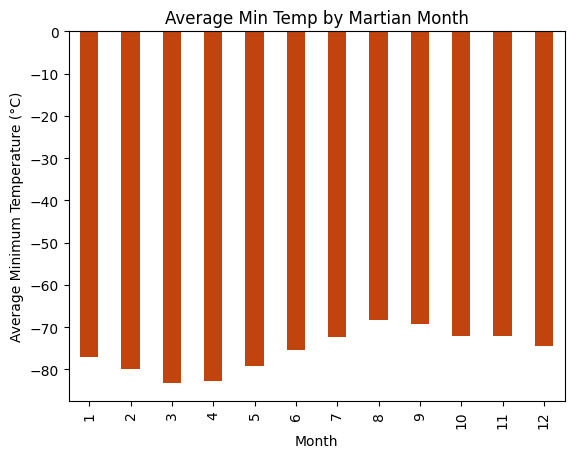

In [16]:
# Plot the average temperature by month

# Use index to extract months 1-12
plt.bar(avgLowTempPerMonth.index, avgLowTempPerMonth, color="#C1440E", width =0.45)

plt.xlabel("Month")
plt.ylabel("Average Minimum Temperature (°C)")
plt.title("Average Min Temp by Martian Month")
plt.xticks(range(1, 13), rotation=90)
plt.xlim(0.5, 12.5)

plt.show()

In [17]:
# Sort months by coldest to warmest temperature
sortedAvgLowTemp = avgLowTempPerMonth.sort_values()
sortedAvgLowTemp

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

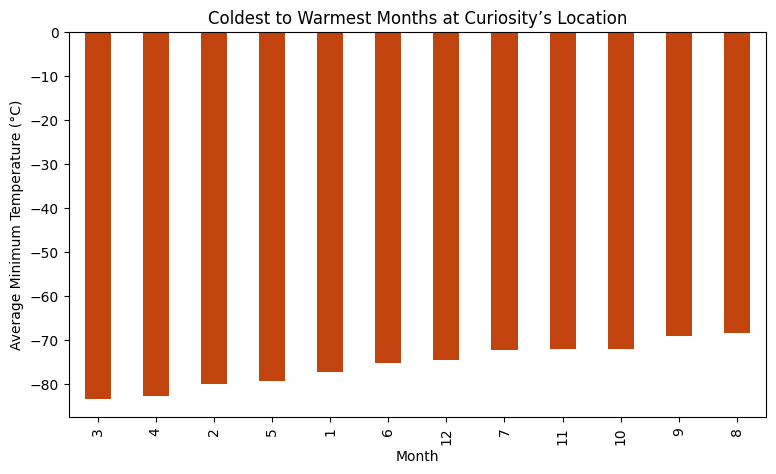

In [18]:
# Identify the coldest and hottest months in Curiosity's location

plt.figure(figsize=(9, 5))  # Keep it close to the starter output dimensions

# Create index of months for x-axis
lowHighMonth = sortedAvgLowTemp.index

# Create categorical x-axis by converting index to strings

plt.bar(lowHighMonth.astype(str), sortedAvgLowTemp, color="#C1440E", width=0.45)

plt.xlabel("Month")
plt.ylabel("Average Minimum Temperature (°C)")
plt.title("Coldest to Warmest Months at Curiosity’s Location")

# Ensure x-ticks display the sorted months correctly
plt.xticks(rotation=90)

# Ensure no bars get cut off
plt.xlim(-0.5, 11.5)  

plt.show()


In [19]:
# 4. Average pressure by Martian month

# Find aggregates through .groupby and .mean
avgPressPerMonth = marsDF.groupby("month")["pressure"].mean()
avgPressPerMonth

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [20]:
# Sort the months low to high using the previously calculated avgPressPerMonth
sortedPressPerMonth = avgPressPerMonth.sort_values()

# Create index for months
lowHighPressMonth = sortedPressPerMonth.index
# Convert months from int to string so Matplotlib doesn't automatically order
lowHighPressMonth = lowHighPressMonth.astype(str)
lowHighPressMonth

Index(['6', '5', '7', '4', '12', '11', '1', '8', '3', '10', '2', '9'], dtype='object', name='month')

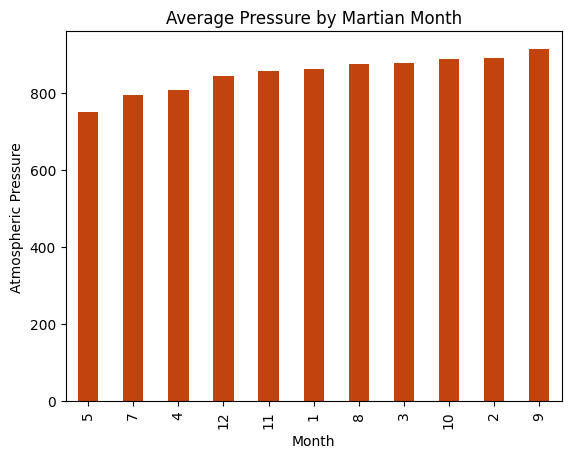

In [21]:
# Plot the average pressure by month

plt.bar(lowHighPressMonth, sortedPressPerMonth, color="#C1440E", width =0.45)

plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")
plt.title("Average Pressure by Martian Month")
plt.xticks(rotation=90)
plt.xlim(0.5, 11.5)

plt.show()

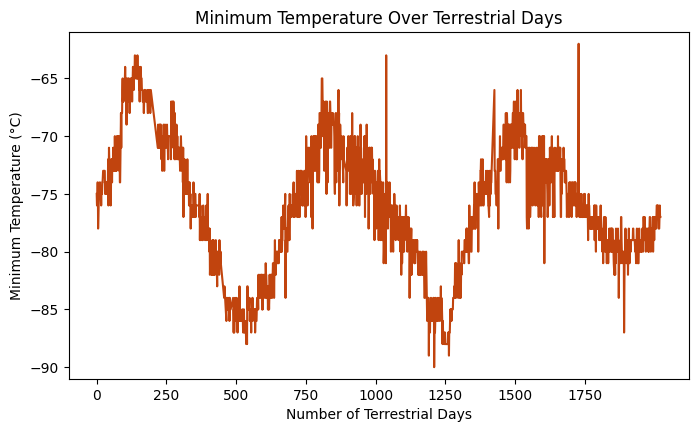

In [22]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Find the earliest recorded terrestrial date
firstDate = marsDF["terrestrial_date"].min()

# Subtract terrestrial_date from first date to get difference
datesDifference = marsDF["terrestrial_date"] - firstDate

# Extract only the number of days
marsDF["terrestrial_days"] = datesDifference.dt.days

# Plot daily minimum temperature over time to estimate the Martian year length
plt.figure(figsize=(8, 4.5))  # Keep consistent with previous figures

# Use terrestrial date as x-axis and min temp as y-axis
plt.plot(marsDF["terrestrial_days"], marsDF["min_temp"], color="#C1440E")

plt.xlabel("Number of Terrestrial Days")
plt.ylabel("Minimum Temperature (°C)")
plt.title("Minimum Temperature Over Terrestrial Days")

# Adjust x-ticks for proper spacing (0 to ~1750 days)
plt.xticks(range(0, 1800, 250))
# plt.xlim(0.5, 1875)
# Set y-axis range to match expected output (-90 to -65°C)
plt.ylim(-91, -61)

plt.show()

## Final Observations
- On average, the **third month** has the coldest minimum temperature on Mars, while the eighth month is the warmest. However, it is always very cold in human terms.
- Atmospheric pressure is, on average, lowest in the **sixth month** and highest is the **ninth month**.
- The Martian year length is estimated by observing temperature cycles. The distance from peak to peak in our plot is approximately 675 Earth days, which is close to the actual Martian year of 687 Earth days (confirmed via external sources).

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [23]:
# Write the data to a CSV
marsDF.to_csv("Output/mars_data.csv", encoding="utf-8", index=False, header=True)

In [24]:
browser.quit()